# Submit your solution to the google form (link is available in telegram channel), due to 10/05/2023 23:59 Moscow time.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train_dataset.csv')

You are asked to build a model to predict the cost of acquiring a customer, the table contains the following features:
1. Store specific information:
    - store_sales(in millions) - store_sales(in million dollars)
    - unit_sales(in millions) - unit_sales(in millions) in stores Quantity
    - Store_sqft - STORE AREA AVAILABLE IN SQFT
    - Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
    - Coffee_bar - COFFEE BAR available in store
    - Video_store - VIDEO STORE/gaming store available
    - Salad_bar - SALAD BAR available in store
    - Prepared_food - food prepared available in store
    - Florist - flower shelves available in store
2. Customer related information:
    - Total_children - TOTAL CHILDREN IN HOME
    - avg_cars_at home(approx) - avg_cars_at home(approx)
    - Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
    - Cost - COST ON ACQUIRING A CUSTOMERS in dollars
3. Information about specific product (which was bought by a customer in the store):
    - Gross_weight - gross_weight OF ITEM
    - Recyclable_package - FOOD ITEM IS recyclable_package
    - Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
    
    
![cfm](convinient_food_mart.jpg)
    
Recall, that this table contains already aggregated, anonymized, obfuscated and partially synthetic data. The dataset contains multiple rows per store, per customer, per item, but we do not have `customer_id`, `purchase_id`, `item_id`, `store_id` fields, thus making the analysis somehow limited. Though, it is ideal for our first home assignment.

---

Your goal for this home assignment is two-fold:
1. Make you comfortable with data wrangling:
    - Extract rows/columns statistics
    - Visualize the dependencies
    - Gain some insights
2. Build a simple, but correct and full machine learning pipeline
    - Select proper performance metrics
    - Split the data into train and test subsets
    - Run a k-fold cross-validation on a training part to select optimal hyperparameters of the model
    - Train a model with optimal hyperparameters on the whole train set
    - Make a predictions on test set
    - Analyse the generalizability of the model by comparing its performance on train and test sets
    - Comment on whether the resulting model is "good" or "bad" from business point of view

# Analyze general data information

## Question 0. What is the goal of this dataset?

In [4]:
df.head(5)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79


## Question 1. How many observations are in the dataset?

In [5]:
print(f"Dataset cointains: {df.shape[0]} observations")

Dataset cointains: 51363 observations


## Question 2. How many features are in the dataset? (excluding `target` column)

In [6]:
print(f"Dataset cointains: {df.shape[1] - 1} features")

Dataset cointains: 15 features


## Question 3. What is the difference between numerical and categorical features?

Which of the following best describes the difference between categorical and numerical features in machine learning?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51363 entries, 0 to 51362
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    51363 non-null  float64
 1   unit_sales(in millions)     51363 non-null  float64
 2   total_children              51363 non-null  float64
 3   num_children_at_home        51363 non-null  float64
 4   avg_cars_at home(approx).1  51363 non-null  float64
 5   gross_weight                51363 non-null  float64
 6   recyclable_package          51363 non-null  float64
 7   low_fat                     51363 non-null  float64
 8   units_per_case              51363 non-null  float64
 9   store_sqft                  51363 non-null  float64
 10  coffee_bar                  51363 non-null  float64
 11  video_store                 51363 non-null  float64
 12  salad_bar                   51363 non-null  float64
 13  prepared_food               513

In [8]:
# All our variables are float. So, we can check is their categorical by count distinct variables in each columns
print("_" * 90)
print('{:30s} {:40s} {:35s} '.format("Column_name","Column_type","Distinct_count"))
print("_" * 90)

for col in df.columns:
    print('{:30s} {:20s} {:35d} '.format(col, "float64", len(df[col].unique())))

__________________________________________________________________________________________
Column_name                    Column_type                              Distinct_count                      
__________________________________________________________________________________________
store_sales(in millions)       float64                                             1030 
unit_sales(in millions)        float64                                                6 
total_children                 float64                                                6 
num_children_at_home           float64                                                6 
avg_cars_at home(approx).1     float64                                                5 
gross_weight                   float64                                              376 
recyclable_package             float64                                                2 
low_fat                        float64                                                

## Question 4. How many numerical and categorical features are in the dataset?  (excluding `target` column)

In [9]:
# Boolean features - where only 2 possible values. Total: 7
# Ordinal features - where 2 < num_distinct < 10. Total: 4
# Numeric features - all others. Total: 4 excluding target `cost`

cat_features = []
num_features = []

for col in df.columns:
    cnt_values = len(df[col].unique())

    if col == "cost":
        continue

    elif cnt_values < 3:
        cat_features.append(col)
    else:
        num_features.append(col)

print('Categorical features, total: ', len(cat_features))
print('Numerical features, total: ', len(num_features))

Categorical features, total:  7
Numerical features, total:  8


# Analyze store specific information

## In most cases stores which have a Coffee bar, do prepare food

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

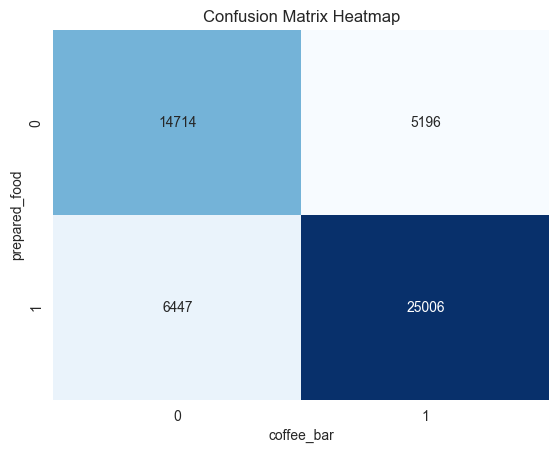

In [11]:
# Compute a confusion matrix
cm = confusion_matrix(df['coffee_bar'], df['prepared_food'])

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels to the x-axis and y-axis
plt.xlabel('coffee_bar')
plt.ylabel('prepared_food')

# Add a title
plt.title('Confusion Matrix Heatmap');

## Question 5. How many stores which have a Salad bar do prepare food?



Based on your answer decide if you need to drop one of the (duplicated) columns.

In [12]:
print(df[(df['coffee_bar'] == 1) & (df['prepared_food'] == 1)].shape[0])

25006


## Having a Coffee bar decreases the average media campaign cost

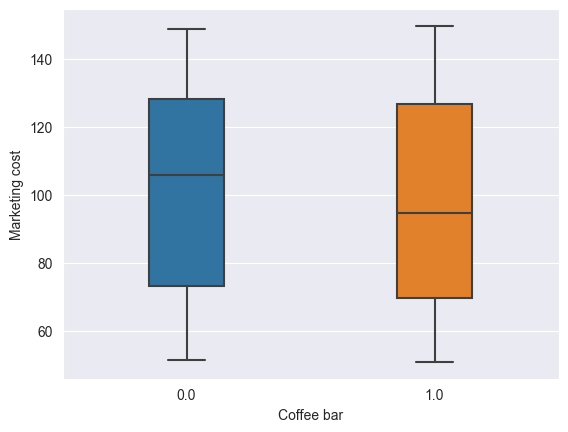

In [13]:
sns.boxplot(data=df, x='coffee_bar', y='cost', width=.3)
plt.xlabel('Coffee bar')
plt.ylabel('Marketing cost');

In [14]:
df.groupby('coffee_bar')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
coffee_bar,,,
0.0,101.659804,105.74,30.162547
1.0,97.850422,94.79,29.841456


## Question 6. Does having a video store, a salad bar, an option to buy prepared food or a	florist decreases the average cost of media campaign?

In [15]:
vars = ['video_store',
        'salad_bar',
        'florist',
        'prepared_food',
        'coffee_bar' # exclude
        ]

In [16]:
df['num_of_services'] = df[vars].apply(lambda x: sum(x), axis=1)

,mean,median,std
num_of_services,,,
0.0,102.915556,108.22,30.033123
1.0,102.849369,101.84,29.537040
2.0,99.184178,105.74,29.466568
4.0,100.598063,95.74,30.996356
5.0,94.843250,92.57,29.479086


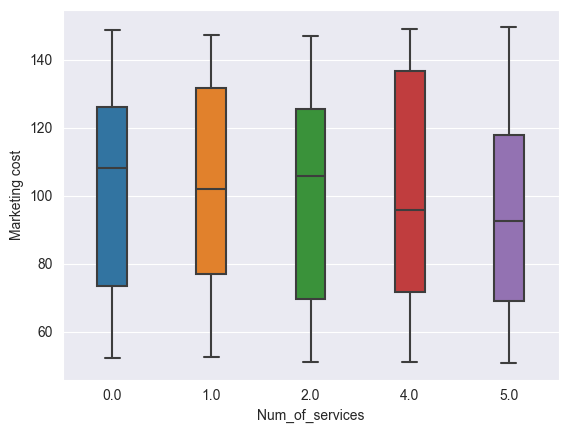

In [17]:
cur_var = 'num_of_services'

sns.boxplot(data=df, x=cur_var, y='cost', width=.3)
plt.xlabel(cur_var.capitalize())
plt.ylabel('Marketing cost')

df.groupby(cur_var)['cost'].agg(['mean', 'median', 'std'])

We can observe kind of tendency that with the increase in the number of additional services, the cost of marketing decreases

# Detalisation

,mean,median,std
video_store,,,
0.0,101.781734,101.84,30.035569
1.0,94.843250,92.57,29.479086


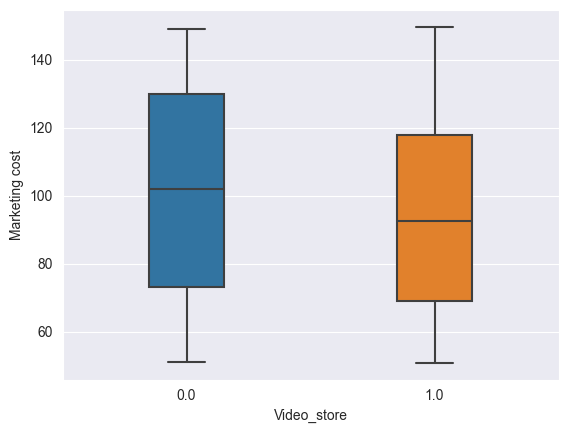

In [18]:
cur_var = vars[0]

sns.boxplot(data=df, x=cur_var, y='cost', width=.3)
plt.xlabel(cur_var.capitalize())
plt.ylabel('Marketing cost')

df.groupby(cur_var)['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
salad_bar,,,
0.0,102.750251,103.90,29.947633
1.0,96.928612,95.45,29.843937


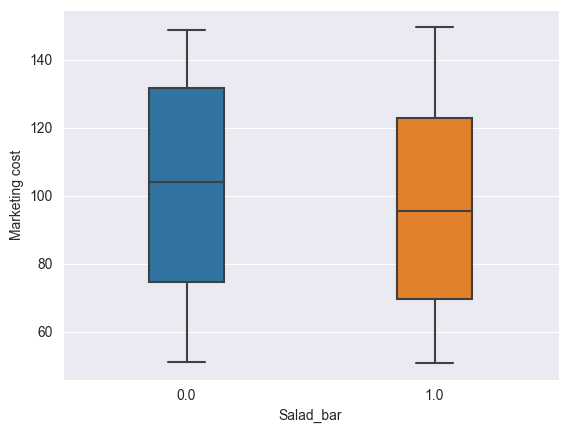

In [19]:
cur_var = vars[1]

sns.boxplot(data=df, x=cur_var, y='cost', width=.3)
plt.xlabel(cur_var.capitalize())
plt.ylabel('Marketing cost')

df.groupby(cur_var)['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
florist,,,
0.0,102.373140,105.74,29.258121
1.0,96.951385,94.79,30.396434


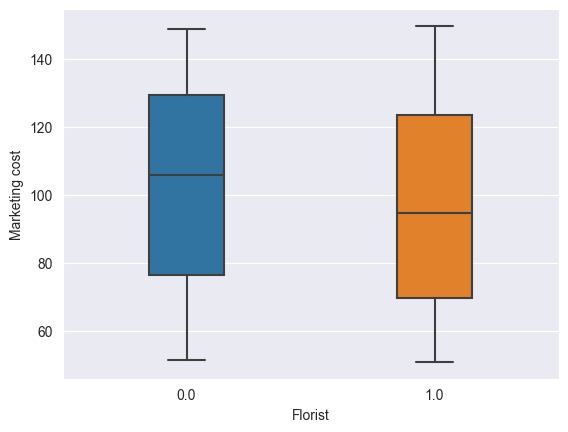

In [20]:
cur_var = vars[2]

sns.boxplot(data=df, x=cur_var, y='cost', width=.3)
plt.xlabel(cur_var.capitalize())
plt.ylabel('Marketing cost')

df.groupby(cur_var)['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
prepared_food,,,
0.0,102.750251,103.90,29.947633
1.0,96.928612,95.45,29.843937


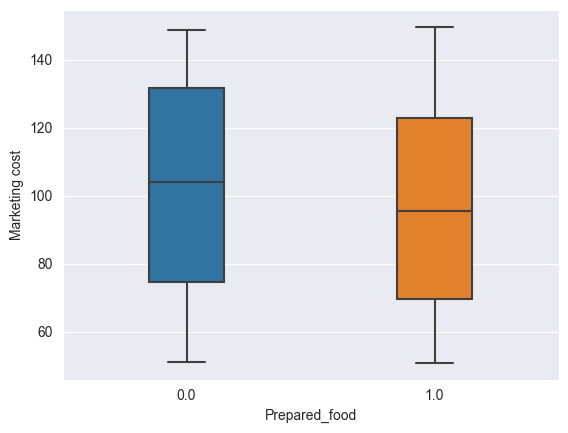

In [21]:
cur_var = vars[3]

sns.boxplot(data=df, x=cur_var, y='cost', width=.3)
plt.xlabel(cur_var.capitalize())
plt.ylabel('Marketing cost')

df.groupby(cur_var)['cost'].agg(['mean', 'median', 'std'])



## Most of the stores have under 15 mln sales, with 90% of sales being under 12 mln.

The distribution is right-skewed (positive skew), with mean around 6.5mln.

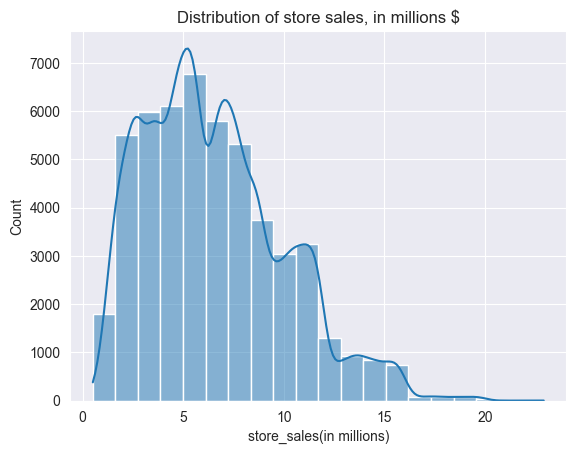

In [22]:
sns.histplot(df['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [23]:
df['store_sales(in millions)'].quantile(0.93)

11.85

In [24]:
df['store_sales(in millions)'].mean()

6.531791562019353

## Question 7. What could you say about distribution of marketing costs?


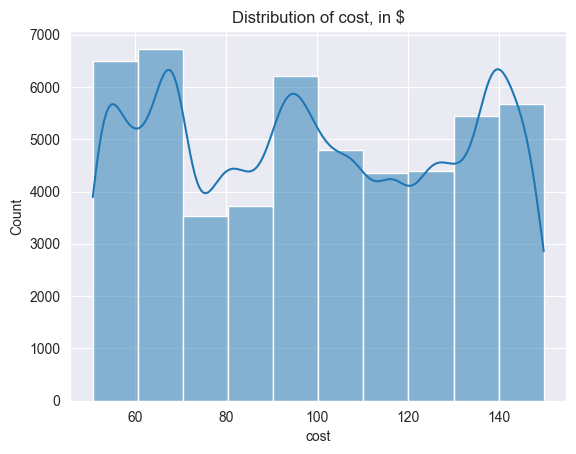

In [25]:
sns.histplot(df['cost'], kde=True, bins=10)
plt.title(f'Distribution of cost, in $');

## Question 8. What percentage of sales go into marketing cost?

Assuming that all rows with the same `store_sales(in millions)` come from the same store, and that all rows are from unique customers, the total sales are $7979\ \text{mln}\ \$, and the total costs are $5101736\$$.


In [26]:
ttl_sales = df['store_sales(in millions)'].unique().sum()

In [27]:
ttl_marketing_cost = df['cost'].sum()

In [28]:
print("Total sales", ttl_sales)
print("Total marketing cost", ttl_marketing_cost)

prct_marketing = (ttl_marketing_cost ) / (ttl_sales * (10 ** 6))

print(prct_marketing * 100)

Total sales 7979.009999999999
Total marketing cost 5101736.01
0.06393946128655059


## Here is a plot of sales vs store area

It seems that while there is no clear dependence (stores with the largest sales vary in the square foot area a lot), 
there are some obvious clusters, e.g. stores with about 25000 square feet area and sales between 3 and 7 mln.

/var/folders/s5/4r_7wwf925g2bnv4060z0x400000gn/T/ipykernel_40174/3314299919.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=sub, x='store_sales(in millions)', y='store_sqft',


<Axes: xlabel='store_sales(in millions)', ylabel='store_sqft'>

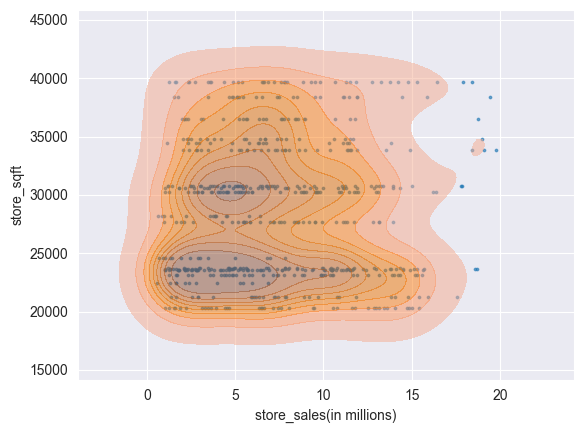

In [29]:
sub = df[['store_sales(in millions)','store_sqft']].drop_duplicates()
sub = sub[::20]

plt.scatter(sub['store_sales(in millions)'], sub['store_sqft'], s=3, alpha=0.6)

sns.kdeplot(data=sub, x='store_sales(in millions)', y='store_sqft',
            palette="deep", alpha=0.5, levels=10, fill=True)

In [30]:
display(sub.head())

,store_sales(in millions),store_sqft
0,2.68,30584.0
20,2.86,33858.0
40,1.04,23688.0
60,2.88,21215.0
80,10.84,30584.0


## Question 9. What is the average sales per squre foot area?

In [31]:
sales_per_square_ft = ((sub['store_sales(in millions)'].sum()) / sub['store_sqft'].sum()) * 10 ** 6

print("Average sales per square foot area", sales_per_square_ft)

Average sales per square foot area 255.5507572565965


## Interestingly, the marketing costs in  stores with >=10 mln sales is not much different from the costs in stores with lower <10mln sales

In [32]:
df[df['store_sales(in millions)'] >= 10]['cost'].mean()

99.60226463674017

In [33]:
df[df['store_sales(in millions)'] < 10]['cost'].mean()

99.26912514730145


## Question 10. Is there any dependence between size of the store in square feet and the cost of marketing?

Select all that apply


In [34]:
!pip install statsmodels


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [53]:
import plotly.express as px

sub = df[['store_sqft','cost']].drop_duplicates()

fig = px.scatter(sub, x='store_sqft', y='cost',
                 trendline='ols')
fig.show()

In [57]:
# Let's create group and analyze average cost of marketing

import numpy as np

inv_borders = [
                       np.nanpercentile(df['store_sqft'], 25),
                       np.nanpercentile(df['store_sqft'], 50),
                       np.nanpercentile(df['store_sqft'], 75),
                       np.nanpercentile(df['store_sqft'], 100)]


def make_group_from_borders(word_count):
    if word_count < inv_borders[0]:
        return '1 Low store_sqft'
    elif inv_borders[0] <= word_count < inv_borders[1]:
        return '2 Lower store_sqft'
    elif inv_borders[1] <= word_count < inv_borders[2]:
        return '3 Higher store_sqft'
    else:
        return '4 High store_sqft'

df['store_sqft.group'] = df['store_sqft'].apply(make_group_from_borders)

In [58]:
df.groupby('store_sqft.group')['cost'].agg(['count',np.mean, np.median])

,count,mean,median
store_sqft.group,,,
1 Low store_sqft,12251,103.869959,108.22
2 Lower store_sqft,10567,101.864275,101.84
3 Higher store_sqft,12320,93.398566,89.37
4 High store_sqft,16225,98.746072,98.81


## Let's investigate the stores with the smallest cost to aqcuire a customers

In [38]:
min_cost = df.cost.min()

In [39]:
# modified
sub = df.query('cost == @min_cost')

In [40]:
store_columns = [
    'store_sales(in millions)','unit_sales(in millions)',
    'store_sqft','coffee_bar','video_store',
    'salad_bar','prepared_food','florist'
]

First, these are mostly small stores with sales under 10mln

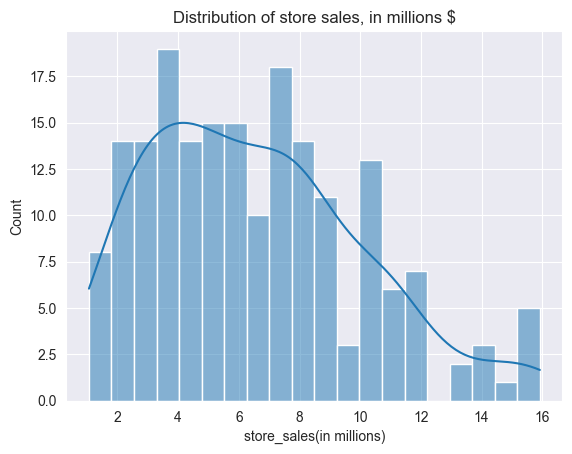

In [41]:
sns.histplot(sub['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [42]:
sub['store_sqft'].mean(), sub['store_sqft'].std() 

(27694.0, 0.0)

In [43]:
sub['store_sqft'].unique()

array([27694.])

Second, it seems they all have **all** additional services

In [44]:
for col in ['coffee_bar','video_store',
    'salad_bar','prepared_food','florist']:
    print(col, sub[col].unique())

coffee_bar [1.]
video_store [1.]
salad_bar [1.]
prepared_food [1.]
florist [1.]


## What about stores with the largest cost to aqcuire a customers?

In [45]:
df.cost.max()

149.75

In [46]:
sub = df.query('cost==149.75')

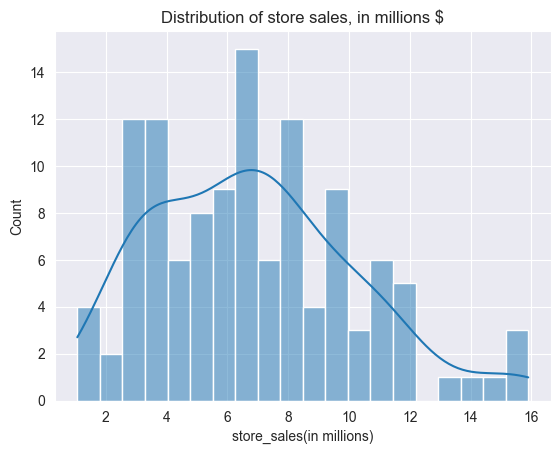

In [47]:
sns.histplot(sub['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [48]:
sub['store_sqft'].mean(), sub['store_sqft'].std() 

(23688.0, 0.0)

In [49]:
for col in ['coffee_bar','video_store',
    'salad_bar','prepared_food','florist']:
    print(col, sub[col].unique())

coffee_bar [1.]
video_store [1.]
salad_bar [1.]
prepared_food [1.]
florist [1.]


They are also mostly small stores with under 10mln sales and all services included. It seems that the difference is not explained by the stores. Could it be explained by customers?

## Question 10. Do distribution of number of kids vary for the lowest cost and largest cost rows?

1. Try using `countplot` instead of `histplot`.
2. Use total number of kids (instead of kids at home)

In [60]:
df

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,num_of_services,store_sqft.group
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59,5.0,3 Higher store_sqft
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36,0.0,1 Low store_sqft
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20,0.0,1 Low store_sqft
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87,5.0,1 Low store_sqft
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79,0.0,4 High store_sqft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51358,3.70,2.0,4.0,4.0,1.0,10.40,1.0,1.0,18.0,34452.0,1.0,0.0,0.0,0.0,1.0,147.17,2.0,4 High store_sqft
51359,10.36,4.0,2.0,0.0,2.0,9.43,0.0,0.0,20.0,30797.0,1.0,1.0,1.0,1.0,1.0,92.57,5.0,4 High store_sqft
51360,11.19,3.0,3.0,0.0,3.0,18.50,0.0,0.0,5.0,30797.0,1.0,1.0,1.0,1.0,1.0,92.57,5.0,4 High store_sqft
51361,3.78,3.0,1.0,1.0,2.0,19.80,0.0,1.0,8.0,23598.0,0.0,0.0,0.0,0.0,1.0,135.92,1.0,2 Lower store_sqft


In [59]:
fig = px.histogram(df, x='total_children',
                   nbins=20)
fig.show()

In [61]:
df.groupby('total_children')['cost'].agg(['count',np.mean, np.median])

,count,mean,median
total_children,,,
0.0,4749,99.814923,98.81
1.0,9943,99.975659,98.81
2.0,10709,98.713164,97.13
3.0,10115,99.554904,99.38
4.0,10576,98.724865,97.45
5.0,5271,99.682351,99.38


## Feel free to investigate other features

# Build Machine Learning pipeline

- What are the proper performance metrics for this task?
- Compare cross-validation performance of 5 ML models
- Compute models' performance on test set
- Analyse the generalizability of the model by comparing its performance on train and test sets
- Comment on whether the resulting model is "good" or "bad" from business point of view

## Question 11. What are the proper performance metrics for this task?

- RMSE
- MAE
-


## Split your data into Train and Test subsets using `train_test_split`, use 70% to 30% ratio for train and test.

## Question 12.  How many observations are in your `train` set?


In [63]:
from sklearn.model_selection import train_test_split

X = df[cat_features + num_features]
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

print("Train size:", X_train.shape )
print("Test size:", X_test.shape )

Train size: (35954, 15)
Test size: (15409, 15)


## We will compare the performance of 5 ML models:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. KNN
5. Gradient Boosting

## Question 13. Which of the models require feature standartization?

- Linear Regression


## We will use `GridSearchCV` method to run 5 fold cross-validation and select models' hyperparameters

see example below (on Iris dataset)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [64]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', refit=True)
clf.fit(iris.data, iris.target)
print(clf.best_score_)

0.9800000000000001


## Explore hyperparameters of different ML models

## Question 14. What does `fit_intercept` parameter responcible for in Linear Regression?

Calculate or not calculate or not to calculate intercept constant

If data is centered, then we do not need a fit_intercept


In [80]:
from sklearn import metrics
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

# Preprocessing for
scaler = Normalizer() # fits it to interval [0, 1]
lr = LinearRegression()

pipe_lr_1 = Pipeline(steps=[("scaler", scaler), ('lr', lr)])


In [152]:
# Centered data

parameters = {'lr__fit_intercept': [True, False]}

lr_cv = GridSearchCV(pipe_lr_1, parameters, cv=5, scoring='neg_mean_absolute_error', refit=True)
lr_cv.fit(X_train, y_train)
print("Best_params:", lr_cv.best_params_)
print("Best_score:", abs(lr_cv.best_score_))
print("Best_estimator:", lr_cv.best_estimator_)

Best_params: {'lr__fit_intercept': True}
Best_score: 25.78120763145235
Best_estimator: Pipeline(steps=[('scaler', Normalizer()), ('lr', LinearRegression())])


Train Linear Regression model using GridSearchCV, compare models with `fit_intercept=True` and `fit_intercept=False` 

## Question 15. What does `max_depth` and `min_samples_split` responcible for in Decision Tree Regressor?


In [117]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)

params = {"max_depth": np.linspace(1, 10, num=5, dtype=int),
          "min_samples_split": np.linspace(start=5, stop=100, num=10, dtype=int)}

tree_cv = GridSearchCV(tree_regressor, params, cv=5, scoring='neg_mean_absolute_error', refit=True)
tree_cv.fit(X_train, y_train)
print("Best_params:", tree_cv.best_params_)
print("Best_score:", abs(tree_cv.best_score_))
print("Best_estimator:", tree_cv.best_estimator_)

Best_params: {'max_depth': 3, 'min_samples_split': 5}
Best_score: 25.19295969951006
Best_estimator: DecisionTreeRegressor(max_depth=3, min_samples_split=5, random_state=42)


Train Decision Tree Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters (`max_depth` and `min_samples_split`) values for search.

## Question 16. What does `n_estimators` and `max_depth` responcible for in Random Forest Regressor?


In [129]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)

params = {"max_depth": [3,5,7],
          "n_estimators": [50, 100, 300, 500]

          }

rf_cv = GridSearchCV(rf_regressor, params, cv=5, scoring='neg_mean_absolute_error', refit=True)
rf_cv.fit(X_train, y_train)
print("Best_params:", rf_cv.best_params_)
print("Best_score:", abs(rf_cv.best_score_))
print("Best_estimator:", rf_cv.best_estimator_)

Best_params: {'max_depth': 7, 'n_estimators': 300}
Best_score: 25.15088455060705
Best_estimator: RandomForestRegressor(max_depth=7, n_estimators=300, random_state=42)


Train Random Forest Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters (`max_depth` and `n_estimators`) values for search.


## Question 17. What does `n_neighbors` responcible for in K Neighbors Regressor?


In [130]:
from sklearn.neighbors import KNeighborsRegressor

In [131]:
knn_regressor = KNeighborsRegressor()

params = {"n_neighbors": np.linspace(1, 200, num=10, dtype=int),
          }

knn_cv = GridSearchCV(knn_regressor, params, cv=5, scoring='neg_mean_absolute_error', refit=True)
knn_cv.fit(X_train, y_train)
print("Best_params:", knn_cv.best_params_)
print("Best_score:", abs(knn_cv.best_score_))
print("Best_estimator:", knn_cv.best_estimator_)

Best_params: {'n_neighbors': 177}
Best_score: 25.259358152238928
Best_estimator: KNeighborsRegressor(n_neighbors=177)


Train KNeighborsRegressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameter `n_neighbors` values for search.

## Question 18. How `n_neighbors` affects KNN performance?

n_neighbors controls the number of neighbors to include in the majority of the voting process

## Question 19. How `learning_rate` and `n_estimators` affect Gradient Boosting Regressor performance?


In [133]:
from sklearn.ensemble import GradientBoostingRegressor

In [138]:
gb_regressor = GradientBoostingRegressor(random_state=42)

params = {"learning_rate": [.005, .01, 0.1, 0.2],
          "n_estimators": [50, 100, 300],
          "max_depth": [3,5,7]
          }

gb_cv = GridSearchCV(gb_regressor, params, cv=5, scoring='neg_mean_absolute_error', refit=True)
gb_cv.fit(X_train, y_train)
print("Best_params:", gb_cv.best_params_)
print("Best_score:", abs(gb_cv.best_score_))
print("Best_estimator:", gb_cv.best_estimator_)

Best_params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
Best_score: 25.135898513167586
Best_estimator: GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=300,
                          random_state=42)


Train Gradient Boosting Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters `learning_rate`, `n_estimators` and `max_depth` values for search. 

## Question 20. Test 5 ML models performance on Test set, which model perform the best?


- Linear Regression
- Decision Tree
- Random Forest
- KNN
- Gradient Boosting


"{'mean_fit_time': array([0.03190336, 0.02798128]), 'std_fit_time': array([0.01947068, 0.01559987]), 'mean_score_time': array([0.0177382 , 0.01529293]), 'std_score_time': array([0.00487582, 0.00671649]), 'param_lr__fit_intercept': masked_array(data=[True, False],\n             mask=[False, False],\n       fill_value='?',\n            dtype=object), 'params': [{'lr__fit_intercept': True}, {'lr__fit_intercept': False}], 'split0_test_score': array([-25.70968995, -25.73888592]), 'split1_test_score': array([-25.70454175, -25.73451534]), 'split2_test_score': array([-25.89077915, -25.92535645]), 'split3_test_score': array([-25.6612306 , -25.68591452]), 'split4_test_score': array([-25.9397967 , -25.94656645]), 'mean_test_score': array([-25.78120763, -25.80624774]), 'std_test_score': array([0.11184215, 0.10773993]), 'rank_test_score': array([1, 2], dtype=int32)}"

In [156]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error
import math

trained_models = [lr_cv, tree_cv, knn_cv, rf_cv, gb_cv]

data = []

for ml in trained_models:

    y_pred = ml.predict(X_test)

    res_rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    res_rmsle = mean_squared_log_error(y_test, y_pred)
    res_mae = mean_absolute_error(y_test, y_pred)
    data.append([str(ml.best_estimator_), res_rmse, res_rmsle, res_mae])

res_df = pd.DataFrame(data, columns=['model', 'rmse', 'rmsle', 'mae'])

res_df

,model,rmse,rmsle,mae
0,"Pipeline(steps=[('scaler', Normalizer()), ('lr...",29.837393,0.101509,25.851386
1,"DecisionTreeRegressor(max_depth=3, min_samples...",29.455720,0.098539,25.255981
2,KNeighborsRegressor(n_neighbors=177),29.274896,0.097355,25.367075
3,"RandomForestRegressor(max_depth=7, n_estimator...",29.131918,0.096605,25.230386
4,"GradientBoostingRegressor(learning_rate=0.01, ...",29.153700,0.096812,25.213802


## Question 21. What is the `MAE` of the best perfroming model? (report `MAE` with 2 decimal places)

In [172]:
from sklearn.metrics import r2_score

y_pred = gb_cv.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
#best_mae = res_df.sort_values(by='mae', ascending=False)['mae'][0]

print("Best_mae: {:.2f} ($)".format(MAE))
print("R^2: {:.2f} ($)".format(R2))

Best_mae: 25.21 ($)
R^2: 0.06 ($)


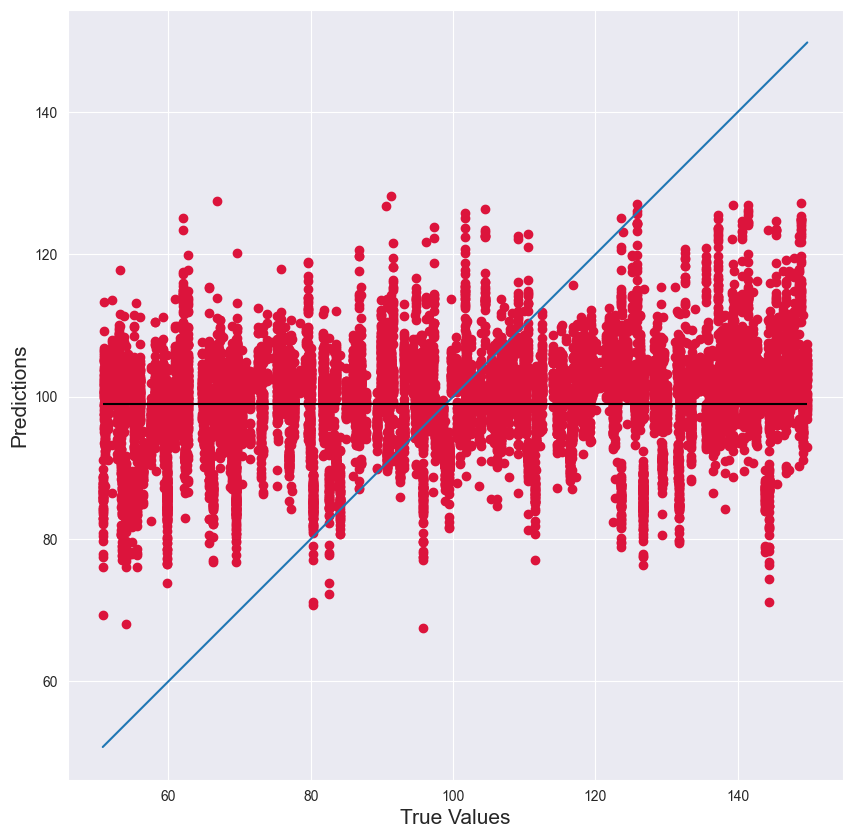

In [171]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2],)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.hlines(y=99, xmin=p2, xmax=p1,colors="black",label="99 $")
plt.axis('equal')
plt.show()

## Question 22. Comment on whether the resulting model is "good" or "bad" from business point of view, given that the mean cost is 99$

In [175]:
mean_residuals = [99 - res for res in y_pred]
print("Saldo for our predictions:", sum(mean_residuals))

Saldo for our predictions: -4412.180400067364


Our model is negative on balance

This is a critical mistake for our model, because if we don't spend enough, we may not increase customer purchases, and if we spend more, it will be over-spending on marketing.

For example, if we actual have to spend 99$ and our model predicted 124$ - we overspent 25$, vice versa - if we save $25 on average, we will not get the desired result

## Upload your Jupyter Notebook or Orange project.